In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# problem function
f = lambda x: 5+3*np.cos(x)
f2 = lambda y, t: -y + t*2 

In [36]:
def simpson(f, a, b, panel):
    x = np.linspace(a,b,panel+1)
    h = x[1] - x[0]
    w = np.ones(panel+1)
    for i in range(panel+1):
        if i % 2 == 0:
            w[i] = 2.0
        else:
            w[i] = 4.0
    w[0] = 1.0
    w[-1] = 1.0
    area = h/3 * np.sum(w * f(x))
    return area

In [37]:
def simpson38(f, a, b, panel):
    x = np.linspace(a,b,panel+1)
    h = x[1] - x[0]
    w = np.ones(panel+1)
    for i in range(panel+1):
        if i % 3 == 0:
            w[i] = 2.0
        else:
            w[i] = 3.0
    w[0] = 1.0
    w[-1] = 1.0
    area = 3*h/8 * np.sum(w * f(x))
    return area

In [38]:
# a
print(simpson(f,0,3,8))
# b
print(3*np.sin(3) + 15)
# c
approx = simpson38(f,0,3,8)
print(approx)
exact = 3*np.sin(3) + 15
err = np.abs((approx - exact) / approx) * 100
print(f"The relative error of the simpson 3/8 rule is: {err}"+"%")

15.423407326222053
15.423360024179601
15.317307691571074
The relative error of the simpson 3/8 rule is: 0.6923692775779827%


In [58]:
def rk5(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    y[0] = y0
    h = x[1] - x[0]
    for i in range(n-1):
        k1 = f(x[i],y[i])
        k2 = f(x[i] + 1/4*h,y[i] + 1/4 * k1*h)
        k3 = f(x[i] + 1/4*h,y[i] + 1/8*k1*h + 1/8*k2*h)
        k4 = f(x[i] + 1/2*h,y[i] - 1/2*k2*h + k3*h)
        k5 = f(x[i] + 3/4*h,y[i] + 3/16*k1*h + 9/16*k4*h)
        k6 = f(x[i] + h,y[i] - 3/7*k1*h + 2/7*k2*h + 12/7*k3*h - 12/7*k4*h + 8/7*k5*h)
        y[i+1] = y[i] + 1/90*h*(7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
    return y

In [59]:
y0 = 1
t = np.linspace(0,3,7)
rungeKutta = rk5(f2,t,y0)
print(rungeKutta)

[  1.           2.53867188   6.29157735  16.06327719  42.1954394
 112.79908761 304.28642616]


In [60]:
# solving analytically
rungeExact = lambda t: (t**2*np.exp(t) - 2*t*np.exp(t) + 2*np.exp(t) - 1) / np.exp(t)
print(rungeExact(t))

[1.         0.64346934 0.63212056 1.02686984 1.86466472 3.167915
 4.95021293]


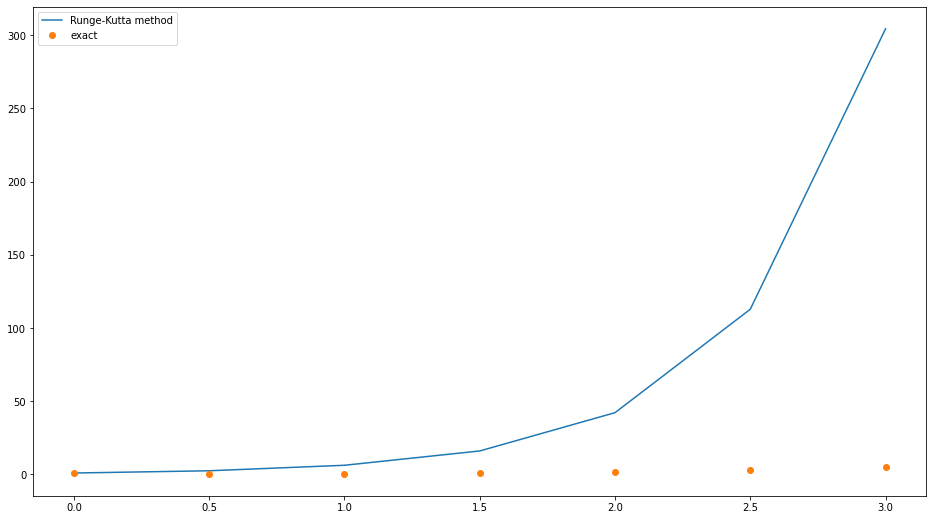

In [61]:
fig = plt.figure(1, figsize = (16,9)); plt.clf(); ax = fig.add_subplot(111)
ax.plot(t, rungeKutta, label = "Runge-Kutta method")
ax.plot(t, rungeExact(t), "o", label ="exact")
ax.legend()

Relative error of the fifth-order runge kutta is 0.001337195822976619


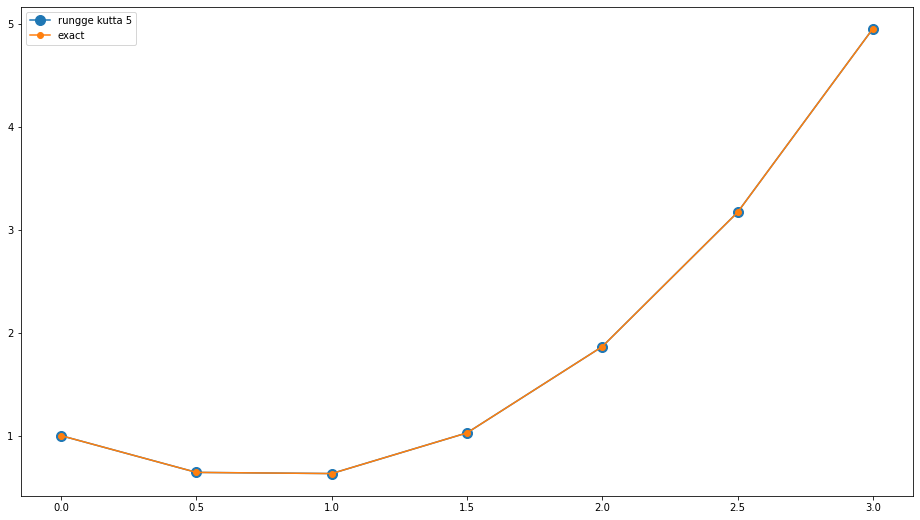

In [62]:
# 2

# 2b Runge-Kutta 5th order method
def rungeKutta(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    dx = 0.5
    y[0] = y0
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + (1 / 4 * dx), y[i] + (1 / 4 * k1 * dx))
        k3 = f(x[i] + (1 / 4 * dx), y[i] + (1 / 8 * k1 * dx) + (1 / 8 * k2 * dx))
        k4 = f(x[i] + (1 / 2 * dx), y[i] - (1 / 2 * k2 * dx) + (k3 * dx))
        k5 = f(x[i] + (3 / 4 * dx), y[i] + (3 / 16 * k1 * dx) + (9 / 16 * k4 * dx))
        k6 = f(x[i] + dx, y[i] - (3 / 7 * k1 * dx) + (2 / 7 * k2 * dx) + (12 / 7 * k3 * dx) - (12 / 7 * k4 * dx) + (8 / 7 * k5 * dx))
        y[i+1] = y[i] + 1 / 90 * dx * (7 * k1 + 32 * k3 + 12 * k4 + 32 * k5 + 7 * k6)
    return y


# 2a
# The original function
f = lambda t, y: -y + t**2

# To find the exact function, integrate the original function
# The C = -1 (after inserting y(0) = 1 to the exact function)
exact = lambda t: (t**2*np.exp(t) - 2*t*np.exp(t) + 2*np.exp(t) - 1) / np.exp(t)

x = np.linspace(0, 3, 7) # Because there are 7 numbers from 0 to 3 with step 0.5
y0 = 1

# 2c
relativeErr = np.abs(np.linalg.norm(rungeKutta(f, x, y0) - exact(x)) / np.linalg.norm(exact(x)) * 100)
print(f'Relative error of the fifth-order runge kutta is {relativeErr}')


plt.figure(figsize = (16,9))
plt.plot(x, rungeKutta(f, x, y0), "-o", label="rungge kutta 5", markersize=10) # 2b
plt.plot(x, exact(x), "-o", label="exact") # 2a
plt.legend()